In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

$\textbf{Testing With Commands}$ 

+ ```export OMP_NUM_THREADS=4``` 

+ ```python run_lebwohl_lasher_p_cython.py 500 150 0.5 0```

$\textbf{1. Ensure Correct Plots Are Produced}$

In [2]:
def plot_data(data):
    """
    Plots energy and order parameter against Monte Carlo step.

    Parameters
    ----------
    data : pd.DataFrame
        The data from the Lebwohl-Lasher simulation.
    """

    # Plot energy and order parameter against Monte Carlo step.
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(data.index, data["Energy"])
    ax[1].plot(data.index, data["Order"])

    ax[0].set_title("Reduced Temperature = 0.5")
    ax[0].set_xlabel("Monte Carlo Step")
    ax[0].set_ylabel("Reduced Energy")

    ax[1].set_title("Reduced Temperature = 0.5")
    ax[1].set_xlabel("Monte Carlo Step")
    ax[1].set_ylabel("Order Parameter")

    fig.tight_layout()
    plt.show()

$\textbf{1.1 Base Version}$

+ ```lebwohl_lasher_p_cython.py Version: Commit - 21ad27ad22d04ad7ed01aea9d3cb6b2871712823```

+ $\text{This version is the same as the serial cython script from commit }$ ```405a8495a98b987808e9315b3130aede8a8fa676``` $\text{.}$

In [3]:
# Read in the output data.
data_001 = pd.DataFrame(np.loadtxt("output_logs/output_normal_21ad27ad22d04ad7ed01aea9d3cb6b2871712823.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -22485.6 |  0.2512 |
|     1 |  0.678  | -33535.9 |  0.2561 |
|     2 |  0.6301 | -40459.7 |  0.2565 |
|     3 |  0.5844 | -45608.6 |  0.257  |
|     4 |  0.5551 | -49388   |  0.2563 |


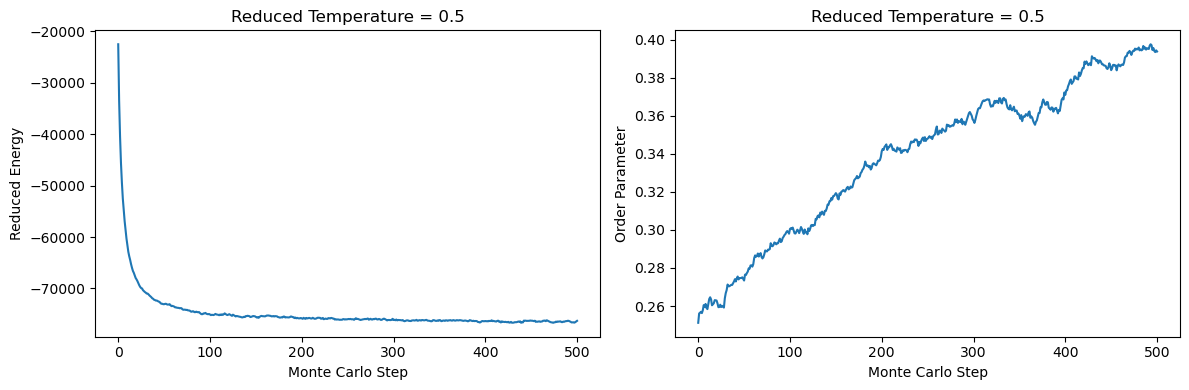

In [4]:
# Plot the output data.
plot_data(data_001)

$\textbf{1.2 Parallelised Function:}$ ```total_energy```

+ ```lebwohl_lasher_p_cython.py Version: Commit - 73b14f64eb4278e84eb65abce9aec72bdad5a844```

In [5]:
# Read in the output data.
data_002 = pd.DataFrame(np.loadtxt("output_logs/output_normal_73b14f64eb4278e84eb65abce9aec72bdad5a844.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_002.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -22305.4 |  0.2572 |
|     1 |  0.6848 | -33492.2 |  0.2577 |
|     2 |  0.6222 | -40457   |  0.2607 |
|     3 |  0.5872 | -45941.1 |  0.2618 |
|     4 |  0.5565 | -49940.5 |  0.2692 |


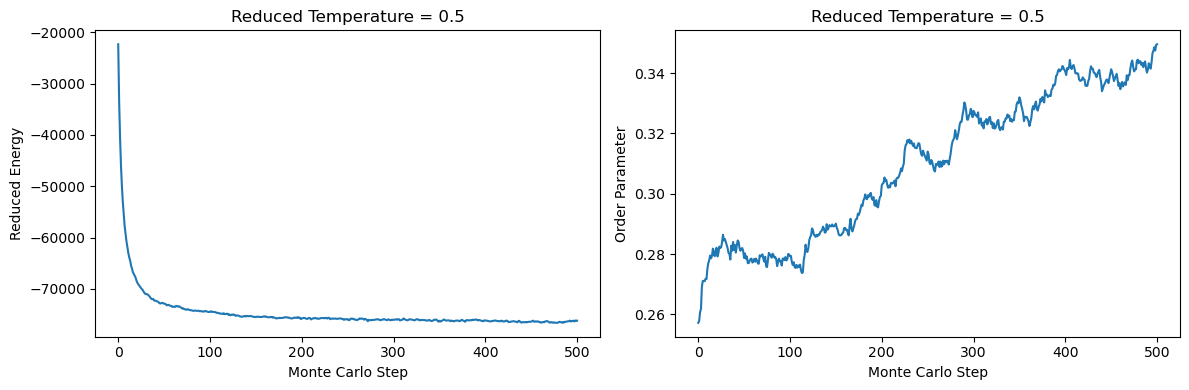

In [6]:
# Plot the output data.
plot_data(data_002)

$\textbf{2. Check Output Values Are Consistent}$

+ $\text{Test if the output logs across versions of the code are the same.}$
+ $\text{This is done through performing a simulation where the random seed is to 42.}$

- ```-> np.random.seed(42)```

$\textbf{2.1 Base Version}$

+ ```lebwohl_lasher_p_cython.py Version: Commit - 21ad27ad22d04ad7ed01aea9d3cb6b2871712823```

+ $\text{This version is the same as the serial cython script from commit }$ ```405a8495a98b987808e9315b3130aede8a8fa676``` $\text{.}$

In [7]:
# Read in the data.
data_compare_001 = pd.DataFrame(np.loadtxt("output_logs/output_seed_42_21ad27ad22d04ad7ed01aea9d3cb6b2871712823.txt", 
                                             dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_compare_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -22904.3 |  0.2558 |
|     1 |  0.6771 | -33964.2 |  0.2537 |
|     2 |  0.6232 | -40819.7 |  0.2556 |
|     3 |  0.5841 | -45855.2 |  0.2576 |
|     4 |  0.5588 | -49607.9 |  0.26   |


$\textbf{2.2 Parallelised Function:}$ ```total_energy```

+ ```lebwohl_lasher_p_cython.py Version: Commit - 73b14f64eb4278e84eb65abce9aec72bdad5a844```

In [8]:
# Read in the data.
data_compare_002 = pd.DataFrame(np.loadtxt("output_logs/output_seed_42_73b14f64eb4278e84eb65abce9aec72bdad5a844.txt", 
                                             dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_compare_002.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -22904.3 |  0.2558 |
|     1 |  0.6771 | -33964.2 |  0.2537 |
|     2 |  0.6232 | -40819.7 |  0.2556 |
|     3 |  0.5841 | -45855.2 |  0.2576 |
|     4 |  0.5588 | -49607.9 |  0.26   |


In [9]:
# Assert the new version produces data that is consistent.
np.allclose(data_compare_001, data_compare_002)

True

$\textbf{3. Time Specific Functions}$

In [10]:
# Import the script.
import run_lebwohl_lasher_p_cython
import lebwohl_lasher_p_cython

In [11]:
# Generate a lattice.
lattice_length = 150
lattice = run_lebwohl_lasher_p_cython.init_lattice(lattice_length)

# Generate two lattice positions to time the "cell_energy" function.
x_pos, y_pos = np.random.randint(0, high=lattice_length, size=2)

$\textbf{3.1 Base Version}$

+ ```lebwohl_lasher_p_cython.py Version: Commit - 21ad27ad22d04ad7ed01aea9d3cb6b2871712823```

+ $\text{This version is the same as the serial cython script from commit }$ ```405a8495a98b987808e9315b3130aede8a8fa676``` $\text{.}$

In [ ]:
# # Time the "cell_energy" function.
# %timeit lebwohl_lasher_p_cython.cell_energy(lattice, lattice_length, x_pos, y_pos)

367 ns ± 25.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
# # Time the "total_energy" function.
# %timeit lebwohl_lasher_p_cython.total_energy(lattice, lattice_length)

1.99 ms ± 68.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# # Time the "calculate_order" function.
# %timeit lebwohl_lasher_p_cython.calculate_order(lattice, lattice_length)

774 μs ± 30.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
# # Time the "monte_carlo_step" function.
# %timeit lebwohl_lasher_p_cython.monte_carlo_step(lattice, lattice_length, temperature=0.5)

5.93 ms ± 276 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


$\textbf{3.2 Parallelised Function:}$ ```total_energy```

+ ```lebwohl_lasher_p_cython.py Version: Commit - 73b14f64eb4278e84eb65abce9aec72bdad5a844```

In [15]:
# Time the "total_energy" function.
%timeit lebwohl_lasher_p_cython.total_energy(lattice, lattice_length)

1.19 ms ± 167 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
